**CAR PRICE PREDICTION**

By Shivadharshini G

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  
Mean Squared Error: 0.9690254797627559


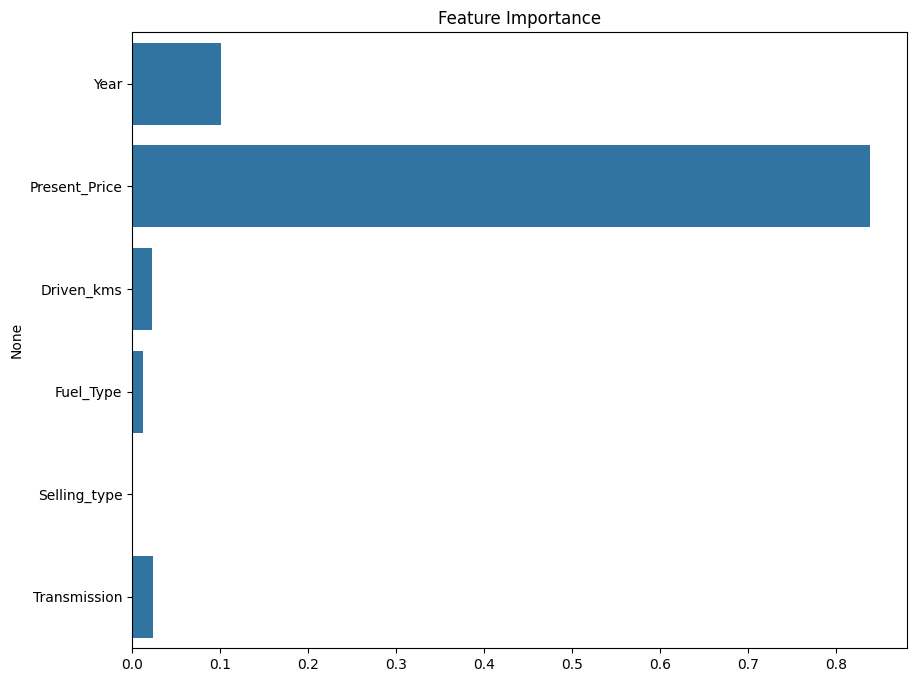

Model saved as 'car_price_model.pkl'


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/car data.csv')  # Replace 'car_data.csv' with the path to your dataset

# Display the first few rows of the dataset
print(data.head())

# Data Preprocessing
# Convert categorical columns to numerical
label_encoders = {}
categorical_columns = ['Fuel_Type', 'Selling_type', 'Transmission']

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Drop unnecessary columns
data = data.drop(columns=['Car_Name', 'Owner'])

# Split the data into features and target variable
X = data.drop(columns=['Selling_Price'])
y = data['Selling_Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a machine learning model (XGBoost Regressor)
model = XGBRegressor(n_estimators=1000, learning_rate=0.01, max_depth=6, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot feature importance
plt.figure(figsize=(10, 8))
feature_importances = model.feature_importances_
features = X.columns
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance')
plt.show()

# Save the model
import joblib
joblib.dump(model, 'car_price_model.pkl')

print("Model saved as 'car_price_model.pkl'")


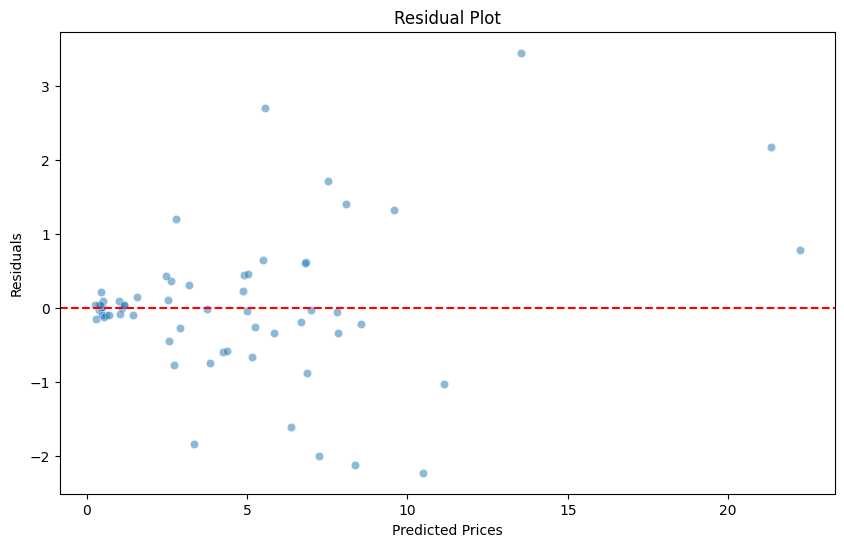

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'y_test' and 'y_pred' are the actual and predicted prices
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


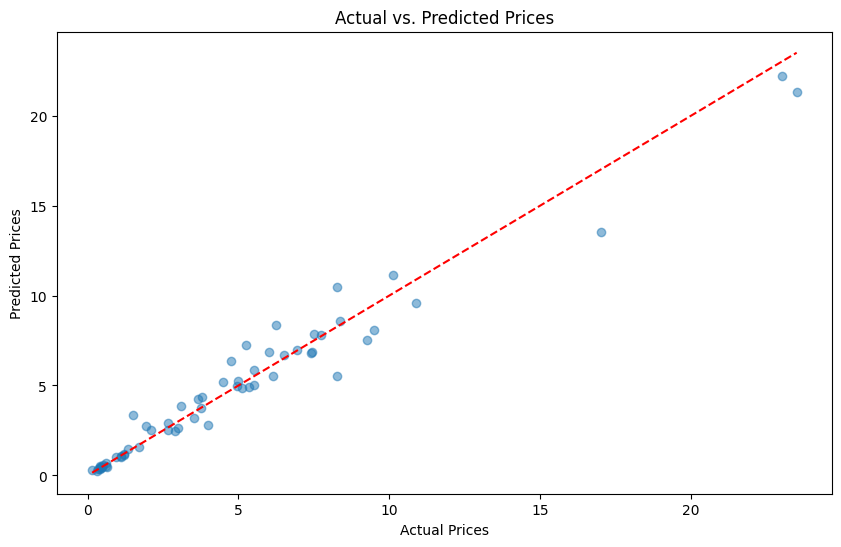

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()


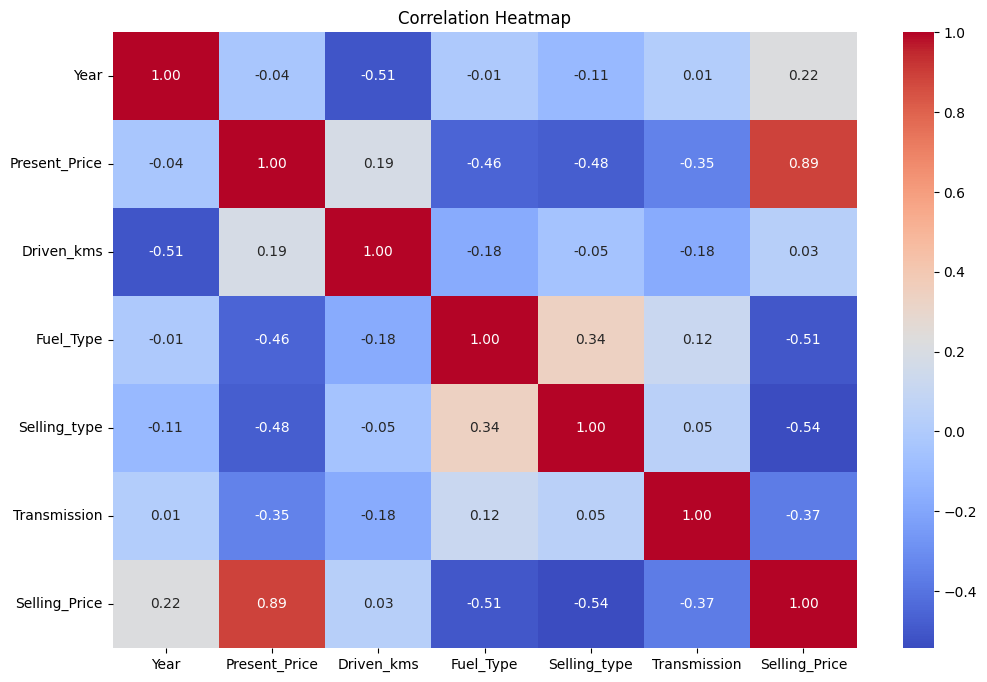

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine features and target variable into one DataFrame for correlation analysis
data = X_train.copy()
data['Selling_Price'] = y_train

plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
